## 数据科学入门1.3：简单线性回归

## Introduction to Data Science Part1.3: Basic Regression 

## Python中的简单线性回归

### 基本的拟合

>Exp 1：首先我们看看这个数据：

|    Weekly $ Ad Expense (x)    |    Weekly $ Sales (y)    |
|-------------------------------|--------------------------|
|    63,566                     |    651,334               |
|    50,762                     |    527,670               |
|    50,941                     |    523,751               |
|    17,597                     |    175,467               |
|    33,029                     |    377,978               |
|    58,543                     |    520,100               |
|    60,492                     |    620,856               |
|    59,686                     |    593,739               |
|    16,432                     |    181,949               |
|    17,262                     |    184,644               |
|    39,118                     |    379,374               |
|    36,078                     |    238,688               |
|    42,113                     |    410,066               |
|    50,562                     |    413,541               |
|    38,240                     |    340,242               |
|    59,870                     |    582,843               |

这是一个公司每周的广告费支出和每周销量的数据和每周销售额的数据，我们想通过广告费支出来预测销售额，那什么是dependent variable什么是independent variable都知道了吧。我们首先在python上把这个数据导入，然后画个图。

C:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


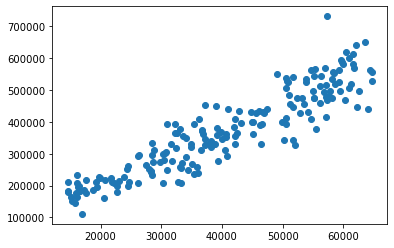

In [1]:
# 导入数据
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_excel('exp_1.xlsx')
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
##plt.show()

然后我们可以看出这些点的分布满足广告投入越大，
销售额也越多（这个有点假哈，广告不得要几天才有效吗😂）

In [3]:
# 建立模型
import statsmodels.api as sm
X = df.iloc[:, 0]
y = df.iloc[:, 1]
X_int = sm.add_constant(X)  # statsmodels需要手动添加一个截距
model = sm.OLS(y, X_int)  # 这里好反人类，传递参数默认是先y后X，当然你可以传显式的(exog=X, endog=y)
res = model.fit()  # 建好模型fit一下
print(res.summary())  # 这里有个summary()方法，能打印出模型的所有信息
print(X_int)

                            OLS Regression Results                            
Dep. Variable:     Weekly $ Sales (y)   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1002.
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           3.05e-77
Time:                        20:30:21   Log-Likelihood:                -2333.3
No. Observations:                 190   AIC:                             4671.
Df Residuals:                     188   BIC:                             4677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

上面这个代码其实很容易理解吧。首先我们调用 `sm.OLS()` 
方法得到一个模型，送进去的参数分别是y和X, 注意这里X可以是一个矩阵，就是说你可能有多变量的线性拟合。
这里的OLS指的就是Ordinary Least Square,普通最小二乘
这里如果要拟合截距的话需要手动增加一个X。
这里我们用一个independent variable的一阶的多项式进行拟合，得到模型之后fit一下，就是一条直线了。
这里我们直接对模型summary一下，就可以看到模型的各种性能了。

我们首先看看模型，我们可以把模型和之前数据的散点画在一起:

'\n这里如果报了一个莫名其妙的`LinAlgError: SVD did not coverage`,\n就重新运行一下这个cell，后面出现类似的相同。\n这里是Windows某个版本更新后的一个bug，可以参考\nhttps://github.com/numpy/numpy/issues/16744。\n这次课先运行两次cell吧，有需求的可以找我要补丁。\n'

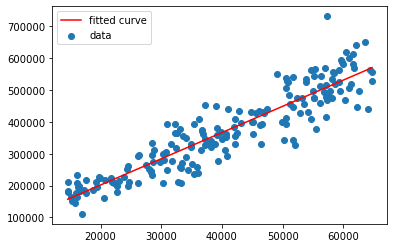

In [4]:
# 拟合图
plt.scatter(X, y, label='data')
import numpy as np
# 要画拟合函数的图就不用原始数据了，我们重新生成一组X，等间距且排序好的
plot_X = np.linspace(X.min(), X.max(), 20).reshape(-1, 1)
# 计算拟合的值
# output = res.params[0] + res.params[1] * plot_X  # 不嫌麻烦的话可以这么写（划掉）
output = res.predict(sm.add_constant(plot_X)) # 直接predict就好，记得加截距，否则会报错
plt.plot(plot_X, output, color='red', label='fitted curve')
plt.legend()  # 显示label

"""
这里如果报了一个莫名其妙的`LinAlgError: SVD did not coverage`,
就重新运行一下这个cell，后面出现类似的相同。
这里是Windows某个版本更新后的一个bug，可以参考
https://github.com/numpy/numpy/issues/16744。
这次课先运行两次cell吧，有需求的可以找我要补丁。
"""


In [10]:

output = res.predict([1,40000])
output

array([366518.98853212])

可以看到效果还是很好的。 **那这个模型怎么用呢？** 
我们先把model打印出来：

In [11]:
res.params

const                      36857.035880
Weekly $ Ad Expense (x)        8.241549
dtype: float64

解释一下,
const就是你模型的截距,Weekly...是你模型的X的系数，他们的值分别是 `const = 36857.035880, (x) = 8.241549` 。
要完成一次预测只要把x带进去就行，执行 `y_hat=res.predict(X)` 就行。

注意这个地方还是要记得把X加个截距项进去，否则shape不同会报错。

**我们再看看如何评估这个模型**  

In [12]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Weekly $ Sales (y)   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1002.
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           3.05e-77
Time:                        20:35:29   Log-Likelihood:                -2333.3
No. Observations:                 190   AIC:                             4671.
Df Residuals:                     188   BIC:                             4677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.686e+04   1.12e+04      3.293      0.001    1.48e+04    5.89e+04
Weekly $ Ad Expense (x)     8.2415      0.260     31.648      0.000       7.728       8.755
==============================================================================
Omnibus:                        7.454   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.024   Jarque-Bera (JB):               11.471
Skew:                           0.175   Prob(JB):                      0.00323
Kurtosis:                       4.152   Cond. No.                     1.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

这里可以看到rsquare，和adj_rsquare，这个代表了你模型解释观测数据的能力，两个数字差不多，
如果你只有一个independent variable,两个是一回事，
如果你有多个变量你关注的应该是adj_rsquare（adjusted r square），
因为当变量增多的时候rsquare一定会减少，adjrsquare是只考虑significant的变量，
这个我们就在这里不多说了。 **这个adjrsquare是越接近1越好。** 
我们在下面的公式和图里面可以看到这个rsquare是怎么算的:

![](2020-02-12-09-56-19.png)  

$$
R^2=\frac{SST-SSR}{SSR}
\\
SST=\sum(y_i-\bar{y}^2)
\\
SSR=\sum(y_i-\hat{y}^2)
$$

可以看出来SST是这个模型不存在时，所有的点的平方和，
$\bar{y}$ 是这些样本的平均值。而SSR是模型与观测数据差的平方求和，
就是模型没有解释的部分，所以（SST-SSR）/SST就是模型解释了的比例，越接近1越好。

好的最后我们在看一下我们要关注的residuals，也就是模型的残差就是 $y_i-\hat{y_i}$ ，
我们把它plot出来：

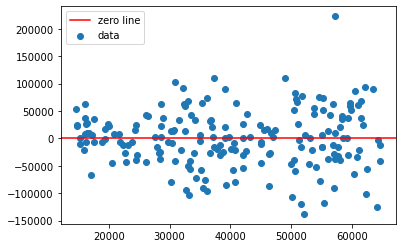

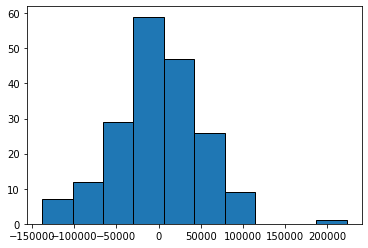

In [13]:
plt.scatter(X, res.resid, label='data')  # res.resid是模型的残差
plt.axhline(y=0, color='red', label='zero line')  # y=0的辅助线
plt.legend()  # 画label
plt.show()
plt.hist(res.resid, edgecolor='black')  # 直方图， edgecolor是柱子的边界颜色
plt.show() 

我们分别画出了残差的散点图和残差的直方图

首先，我们说一下， **一个回归模型是一个好的模型的话，他的残差应该是平均值为0的一个正态分布，同时残差的分布不应该随着x的变化而变化** 。

我们再看看我们的残差，其中有一条红线zero line，可以看到残差在两边分布的还比较均匀，平均值应该是0附近，而且其分布也没有随x变化而变化。  
再看看后面的直方图，残差确实也好象是平均值为0的一个正态分布，说明我们的模型还挺好。

下图这几个残差图就不是特别合适：

![](2020-02-12-10-15-11.png)

我们再看一个例子
>exp2 下面是一个气温和电费单的表格（不完整，完整的参考附件），请根据气温预测电费。  

|    Temperature X    |    Energy Expense Y    |
|---------------------|------------------------|
|    46               |    $236                |
|    52               |    $304                |
|    55               |    $164                |
|    46               |    $214                |
|    47               |    $210                |
|    50               |    $508                |
|    36               |    $295                |

很简单对不对，我们导入数据，然后你们知道代码怎么写对吧：

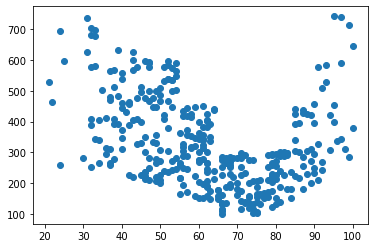

In [15]:
df_2 = pd.read_excel('exp2.xlsx')
plt.scatter(df_2.iloc[:, 0], df_2.iloc[:, 1])

0.3029060806289291

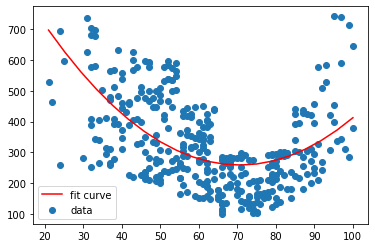

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# 之所以要reshape是因为取出1个特征后的shape是一维的，后面的fit..等都要二维的数组
# 如果有多个independent variable取出来之后就不需要reshape了，当然y还是要的
X = df_2.iloc[:, 0].values.reshape(-1, 1)
y = df_2.iloc[:, 1].values.reshape(-1, 1)

poly_reg = PolynomialFeatures(degree=2)  # degree是多项式阶数
poly_X = poly_reg.fit_transform(X)  # 先fit_transform()一下得到放到模型里的X

poly_X_int = sm.add_constant(poly_X)  # 加截距
poly_model = sm.OLS(y, poly_X_int)  # 因为X以及变成高次多项式了，还是用线性模型拟合
poly_res = poly_model.fit()

# 画拟合图
plt.scatter(X, y, label='data')
poly_plot_X = np.linspace(X.min(), X.max(), 20).reshape(-1, 1)
poly_plot_X_int = sm.add_constant(poly_plot_X)
plt.plot(poly_plot_X, poly_res.predict(poly_reg.fit_transform(poly_plot_X)), color='red', label='fit curve')
plt.legend()

# adj_rsquared
poly_res.rsquared_adj